In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [2]:
def f(a):
    n=4
    return (1/(1+a**n))
def Gly(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 0
    dydt[3]= 0
    dydt[4]= 0
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8
    return dydt 
def solveGly(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1

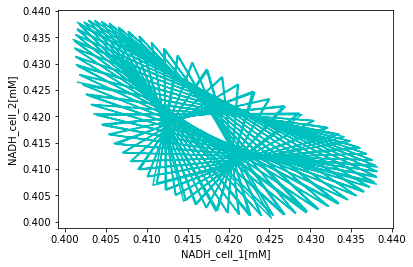

In [58]:
x=np.linspace(0,0.5,200)
x2=np.linspace(0.3,0.8,200)
cell1=solveGly(0.64359951,  5.64399633,  0.5393    ,  0.56646   ,  8.3504    ,
         0.09746995,  0.08193084,  1.37895677,  0.3869099,80,12)
cell2=solveGly(1.58066029,  4.63141298,  0.5393    ,  0.56646   ,  8.3504    ,
         0.10628539,  0.08475373,  2.69596689,  0.34356362,80,12)
plt.figure()
plt.plot(cell1[:,8][20:],cell2[:,8][20:],'c')
plt.xlabel('NADH_cell_1[mM]')
plt.ylabel('NADH_cell_2[mM]')
plt.show()

In [22]:
def sync(repetition):
    i=0
    while i < repetition:
        if i ==0:
            init1=[0.64359951,  5.64399633,  0.5393    ,  0.56646   ,  8.3504    ,
             0.09746995,  0.08193084,  1.37895677,  0.3869099,80,0.1]
            init2=[1.58066029,  4.63141298,  0.5393    ,  0.56646   ,  8.3504    ,
             0.10628539,  0.08475373,  2.69596689,  0.34356362,80,0.1]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],inter1[6],inter1[7],(inter1[6]+inter2[6])/2,80,0.5]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],inter2[6],inter2[7],(inter1[6]+inter2[6])/2,80,0.5]
        c1= solveGly(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10])
        c2= solveGly(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    return (c1,c2)

In [31]:
def sync2(repetition):
    i=0
    while i < repetition:
        if i ==0:
            init1=[0.64359951,  5.64399633,  0.5393    ,  0.56646   ,  8.3504    ,
             0.09746995,  0.08193084,  1.37895677,  0.3869099,80,0.1]
            init2=[1.58066029,  4.63141298,  0.5393    ,  0.56646   ,  8.3504    ,
             0.10628539,  0.08475373,  2.69596689,  0.34356362,80,0.1]
        else:
            init1=[inter1[0],inter1[1],inter1[2],inter1[3],inter1[4],inter1[5],(inter1[6]+inter2[6])/2,inter1[7],inter1[8],80,0.5]
            init2=[inter2[0],inter2[1],inter2[2],inter2[3],inter2[4],inter2[5],(inter1[6]+inter2[6])/2,inter2[7],inter2[8],80,0.5]
        c1= solveGly(init1[0],init1[1],init1[2],init1[3],init1[4],init1[5],init1[6],init1[7],init1[8],init1[9],init1[10])
        c2= solveGly(init2[0],init2[1],init2[2],init2[3],init2[4],init2[5],init2[6],init2[7],init2[8],init2[9],init2[10])
        inter1= c1[-1]
        inter2= c2[-1]
        i+=1
    return (c1,c2)

In [32]:
c_a100,c_b100=sync2(100)

In [46]:
c_a1000,c_b1000=sync2(1000)

In [48]:
c_af,c_bf=sync2(10000)

In [36]:
c_a300,c_b300=sync2(300)

In [37]:
c_a600,c_b600=sync2(600)

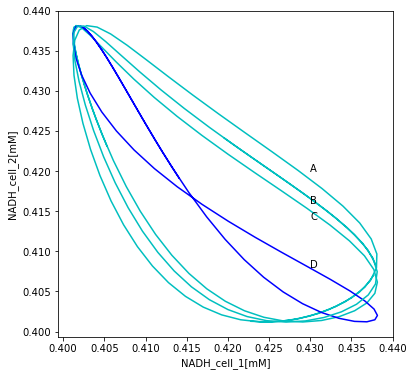

In [68]:
plt.figure(figsize=(6,6))
plt.plot(c_a100[:,8][150:],c_b100[:,8][150:],'c')
plt.plot(c_a1000[:,8][150:],c_b1000[:,8][150:],'c')
plt.plot(c_af[:,8][150:],c_bf[:,8][150:],'b')
plt.plot(c_a600[:,8][150:],c_b600[:,8][150:],'c')
plt.xlabel('NADH_cell_1[mM]')
plt.ylabel('NADH_cell_2[mM]')
plt.text(0.43,0.42,'A')
plt.text(0.43,0.416,'B')
plt.text(0.43,0.414,'C')
plt.text(0.43,0.408,'D')
plt.show()